<p style="text-align:center">
    <a href="https://www.theforage.com/virtual-internships/NkaC7knWtjSbi6aYv">
    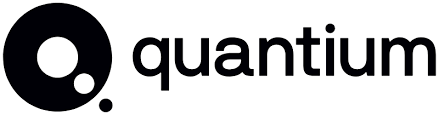
    </a>
</p>
<h1 align="center"><font size="5">Quantium Virtual Internship - Retail Strategy and Analytics</font></h1>

<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 1px">
    <ul>
    <li><a href="https://#Section_1">Task 1: Data Preparation and Customer Analytics</a></li>
    <li><a href="https://#Section_2">Task 2: Experimentation and uplift testing</a></li>
    <li><a href="https://#Section_3">Task 3 </a></li>
</a></li>
</div>

<hr>

# Task 2: Experimentation and uplift testing

## 2.1 Background information

The clients want us to test the impact of the new trial layouts with a data driven recommendation to whether or not the trial layout should be rolled out to all their stores. We will  evaluate the performance of a store trial which was performed in stores 77, 86 and 88 and examine the performance in trial vs control stores to provide a recommendation for each location based on our insight

### Main task
- **Select control stores** – explore the data and define metrics for control store selection
    - Think about what would make them a control store
    - Look at the drivers and make sure you visualise these in a graph to better determine if they are suited.
    - Write a function to reduce having to re-do the analysis for each trial store.: Consider using *Pearson correlations or a metric such as a magnitude distance* e.g. 1- (Observed distance – minimum distance)/(Maximum distance – minimum distance) as a measure.
    
- **Assessment of the trial** – this one should give you some interesting insights into each of the stores
    - Check each trial store individually in comparison with the control store to get a clear view of its overall performance.
    - We want to know if the trial stores were successful or not: test if total sales are significantly different in the trial period and if so, check if the driver of change is more purchasing customers or more purchases per customers etc.
    
- **Collate findings** – summarise your findings for each store and provide an recommendation outlining the impact on sales during the trial period.

## 2.2 Select control store

The client has selected store numbers **77, 86 and 88** as trial stores and want control stores to be established stores that are operational for the entire observation period.
We would want to match trial stores to control stores that are similar to the trial store prior to **the trial period of Feb 2019** in terms of :
- Monthly overall sales revenue
- Monthly number of customers
- Monthly number of transactions per customer

The data range from 2018-07-01 to 2019-06-30

In [4]:
# import libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import pearsonr

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
## changer notebook render
import plotly.io as pio
pio.renderers.default = 'iframe' # or 'notebook' or 'colab' or 'jupyterlab'

# use regular expression
import re

In [5]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [6]:
# read the data
df = pd.read_csv("QVI_data_quantium.csv", parse_dates=['DATE'])
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [7]:
# Create a month column
df['YEAR_MONTH'] = df['DATE'].dt.strftime('%Y-%m')
df['YEAR_MONTH'] = pd.to_datetime(df['YEAR_MONTH'])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
 12  YEAR_MONTH        264834 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memor

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2018-10-01
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2018-09-01
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2019-03-01
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2019-03-01
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2018-11-01


In [8]:
# Calulate the Monthly overall sales revenue, number of customers, number of transactions per customer,
# number of chips per customer, average price per unit
df_month = df.groupby(['STORE_NBR', 'YEAR_MONTH']).agg({'TOT_SALES':'sum',
                                                        'LYLTY_CARD_NBR':'nunique',
                                                        'TXN_ID':'nunique',
                                                        'PROD_QTY':'sum'}).reset_index()
df_month.rename({'TOT_SALES':'TotSales',
                 'LYLTY_CARD_NBR':'nCust',
                 'TXN_ID':'nTrans',
                 'PROD_QTY':'nChips'}, axis=1, inplace=True)

df_month['nTransPerCust'] = df_month['nTrans'] / df_month['nCust']
df_month['nChipsPerCust'] = df_month['nChips'] / df_month['nCust']
df_month['avgPricePerUnit'] = df_month['TotSales'] / df_month['nChips']
df_month.drop(['nTrans', 'nChips'], axis=1, inplace=True)

df_month.info()
df_month.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STORE_NBR        3169 non-null   int64         
 1   YEAR_MONTH       3169 non-null   datetime64[ns]
 2   TotSales         3169 non-null   float64       
 3   nCust            3169 non-null   int64         
 4   nTransPerCust    3169 non-null   float64       
 5   nChipsPerCust    3169 non-null   float64       
 6   avgPricePerUnit  3169 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 173.4 KB


,STORE_NBR,YEAR_MONTH,TotSales,nCust,nTransPerCust,nChipsPerCust,avgPricePerUnit
0,1,2018-07-01,206.9,49,1.061224,1.265306,3.337097
1,1,2018-08-01,176.1,42,1.023810,1.285714,3.261111
2,1,2018-09-01,278.8,59,1.050847,1.271186,3.717333
3,1,2018-10-01,188.1,44,1.022727,1.318182,3.243103
4,1,2018-11-01,192.6,46,1.021739,1.239130,3.378947


In [9]:
# drop stores that don't have enough records for all 12 months
month_counts = df_month.groupby(['STORE_NBR']).agg({'YEAR_MONTH':'nunique'}).reset_index()
store_full_months = month_counts[month_counts['YEAR_MONTH'] == 12]['STORE_NBR']
df_full_months = df_month[df_month['STORE_NBR'].isin(store_full_months)]
df_full_months.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3120 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   STORE_NBR        3120 non-null   int64         
 1   YEAR_MONTH       3120 non-null   datetime64[ns]
 2   TotSales         3120 non-null   float64       
 3   nCust            3120 non-null   int64         
 4   nTransPerCust    3120 non-null   float64       
 5   nChipsPerCust    3120 non-null   float64       
 6   avgPricePerUnit  3120 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2)
memory usage: 195.0 KB


In [10]:
# Get the period before Feb 2019 to compare
df_before_feb2019 = df_full_months[df_full_months['YEAR_MONTH'] < '2019-02']
df_before_feb2019['YEAR_MONTH'].unique()

array(['2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-01-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [11]:
all_stores = df_before_feb2019['STORE_NBR'].unique()
# def a function to compare each trial store to all store to choose control stores
def compare_store(trial_store, all_stores, df):
    metrics = ['TotSales', 'nCust','nTransPerCust']
    df_trial = df[df['STORE_NBR'] == trial_store].reset_index(drop=True)
    choose_store = pd.DataFrame({'trial_store':[],'control_store':[],'PearsonCorr':[], 'magnitude':[]})
    for control_store in all_stores:
        df_store = df[df['STORE_NBR'] == control_store].reset_index(drop=True)
        pearson = []
        magnitude = []
        for metric in metrics:
            # Pearson's correlation
            cor_value = pearsonr(df_trial[metric], df_store[metric])[0]
            pearson.append(abs(cor_value))

            # magnitude distance 1-(Observed distance – minimum distance)/(Maximum distance – minimum distance)
            diff = abs(df_trial[metric] - df_store[metric])
            magnitude_value = np.mean(1 - (diff - min(diff))/(max(diff) - min(diff)))
            magnitude.append(abs(magnitude_value))

        pearson_score = np.mean(pearson)
        magnitude_score = np.mean(magnitude)
        choose_store = pd.concat([choose_store, pd.DataFrame({'trial_store':trial_store,
                                                             'control_store':control_store,
                                                             'PearsonCorr':pearson_score,
                                                             'magnitude':magnitude_score}, index=[len(choose_store)])])

    ## Combine the 2 metrics: average
    choose_store['avg_score'] = (choose_store['PearsonCorr'] + choose_store['magnitude'])/2
    return choose_store.sort_values('avg_score', ascending=False)

In [12]:
# function to plot control store and trial store based on the features
def plot_compare(trial_store, control_store, df):
    # add a column to identified trial store, control_store and other stores
    df_new = df.copy()
    conditions = [(df_new['STORE_NBR'] == trial_store), (df_new['STORE_NBR'] == control_store)]
    choices = [f'Trial Store {trial_store}', f'Control Store {control_store}']
    df_new['store_type'] = np.select(conditions, choices, default='other_stores')

    df_plot = pd.pivot_table(df_new, values=['TotSales', 'nCust', 'nTransPerCust'],
                          index ='YEAR_MONTH', columns='store_type', aggfunc = 'mean')

    columns_to_plot = ['TotSales', 'nCust','nTransPerCust']

    # Iterate over the columns to plot
    for column in columns_to_plot:
        # Create a new figure for each plot
        plt.style.use("ggplot")
        fig, ax = plt.subplots(figsize=(6,3), dpi=100)

        # Plot the lines for each store type
        for store_type in df_plot.columns:
            ax.plot(df_plot.index, df_plot[column])

        # Set the title and labels
        ax.set_title(column)
        ax.set_xlabel('YEAR_MONTH')
        ax.set_ylabel(column)
        plt.legend([f'Trial Store {trial_store}', f'Control Store {control_store}', 'Other Stores'],
                   loc = "upper left",bbox_to_anchor=(1.0, 1.0),title="STORE_NBR")

        # Show the plot
        plt.show()

In [13]:
trial_store = 77
control_store = 233
df_new = df_before_feb2019.copy()
conditions = [(df_new['STORE_NBR'] == trial_store), (df_new['STORE_NBR'] == control_store)]
choices = [f'Trial Store {trial_store}', f'Control Store {control_store}']
df_new['store_type'] = np.select(conditions, choices, default='other_stores')
df_plot = pd.pivot_table(df_new, values=['TotSales', 'nCust', 'nTransPerCust'],
                      index ='YEAR_MONTH', columns='store_type', aggfunc = 'mean')
df_plot

TotSales                                         nCust  \
store_type Control Store 233 Trial Store 77 other_stores Control Store 233   
YEAR_MONTH                                                                   
2018-07-01             290.7          296.8   638.004651              51.0   
2018-08-01             285.9          255.5   610.223450              48.0   
2018-09-01             228.6          225.2   620.198450              42.0   
2018-10-01             185.7          204.5   635.314729              35.0   
2018-11-01             211.6          245.3   618.864341              40.0   
2018-12-01             279.8          267.3   648.453876              47.0   
2019-01-01             177.5          204.4   628.684496              35.0   

                                           nTransPerCust                 \
store_type Trial Store 77 other_stores Control Store 233 Trial Store 77   
YEAR_MONTH                                                                
2018-07-01           51.0    72.333333          1.058824       1.078431   
2018-08-01           47.0    72.120155          1.041667       1.021277   
2018-09-01           42.0    70.131783          1.071429       1.047619   
2018-10-01           37.0    71.608527          1.028571       1.027027   
2018-11-01           41.0    70.534884          1.025000       1.073171   
2018-12-01           46.0    73.515504          1.063830       1.043478   
2019-01-01           35.0    71.240310          1.000000       1.114286   

                         
store_type other_stores  
YEAR_MONTH               
2018-07-01     1.147553  
2018-08-01     1.145081  
2018-09-01     1.144962  
2018-10-01     1.147477  
2018-11-01     1.143319  
2018-12-01     1.147287  
2019-01-01     1.145118

### Store 77

In [14]:
## Choose the store with the highest score as the control store
trial_store = 77
control_store_77 = compare_store(trial_store, all_stores, df_before_feb2019)
control_store_77.head()

,trial_store,control_store,PearsonCorr,magnitude,avg_score
221,77.0,233.0,0.796772,0.610971,0.703871
111,77.0,119.0,0.884487,0.515722,0.700104
46,77.0,50.0,0.655307,0.608435,0.631871
149,77.0,157.0,0.765389,0.476690,0.621040
178,77.0,186.0,0.658681,0.575268,0.616974


Let's try to plot control store 233 and trial store 77


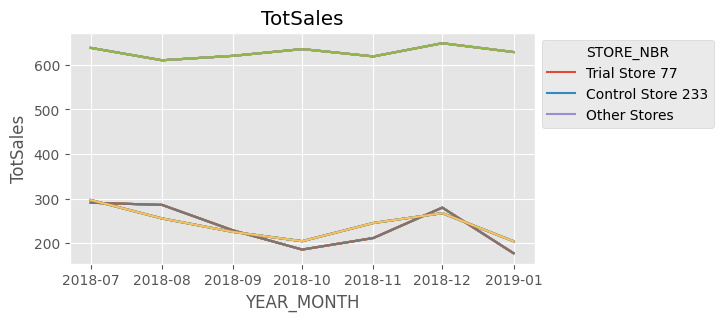

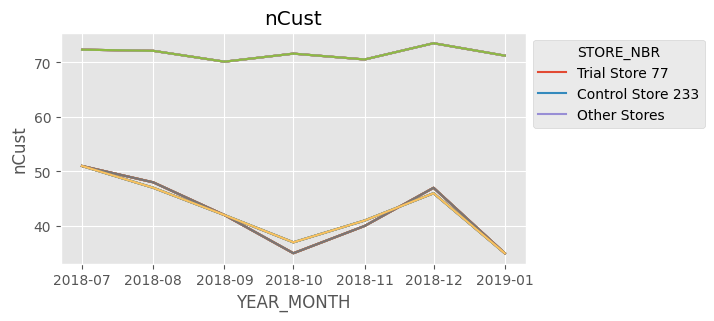

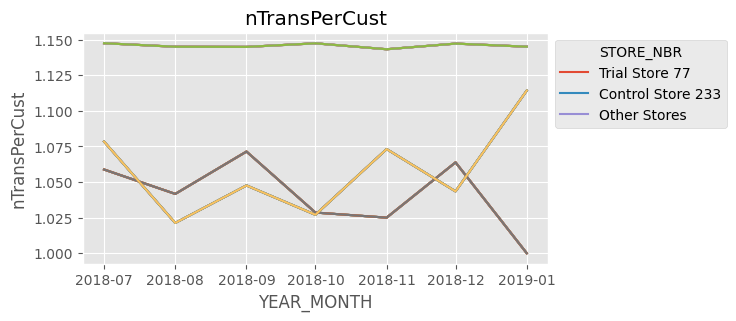

In [15]:
trial_store = 77
control_store = 233
plot_compare(trial_store, control_store, df_before_feb2019)

### Store 86

In [17]:
## Choose the store with the highest score as the control store
trial_store = 86
control_store_86 = compare_store(trial_store, all_stores, df_before_feb2019)

control_store_86.head()

,trial_store,control_store,PearsonCorr,magnitude,avg_score
102,86.0,109.0,0.636923,0.647698,0.642311
147,86.0,155.0,0.630510,0.607653,0.619082
130,86.0,138.0,0.684236,0.536395,0.610316
21,86.0,23.0,0.670570,0.546942,0.608756
173,86.0,181.0,0.603126,0.583494,0.593310


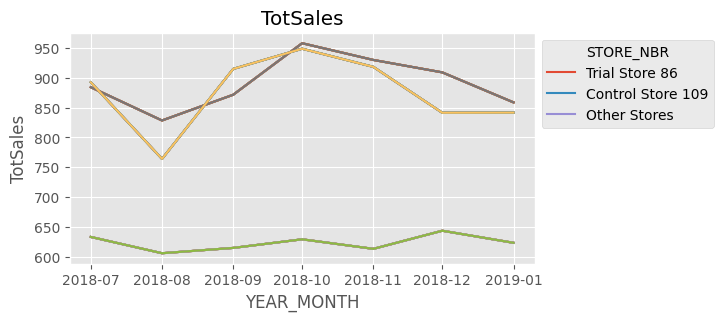

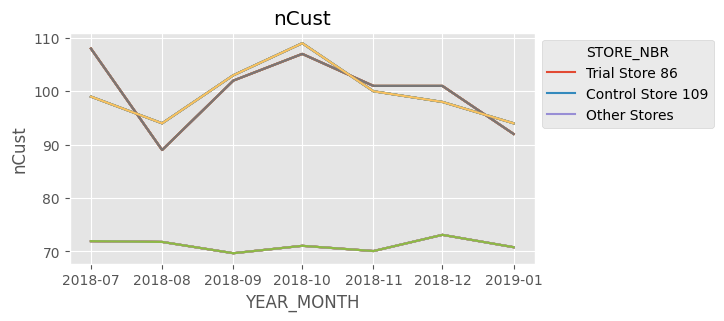

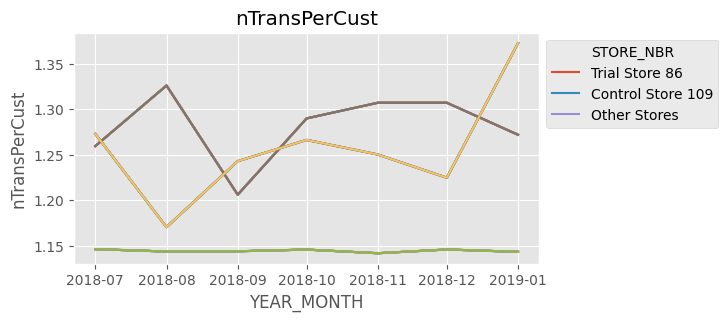

In [18]:
trial_store = 86
control_store = 109
plot_compare(trial_store, control_store, df_before_feb2019)

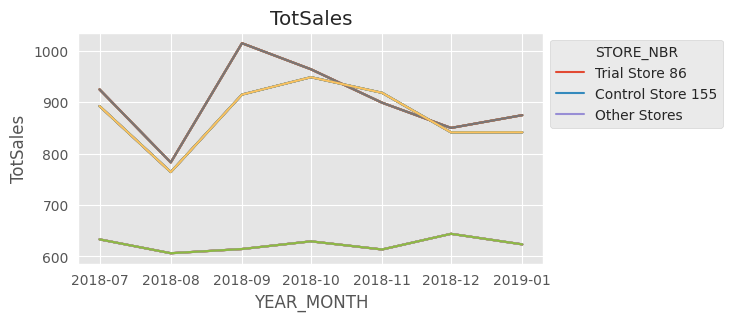

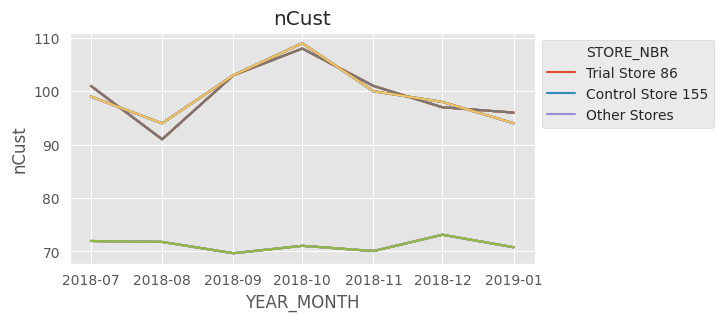

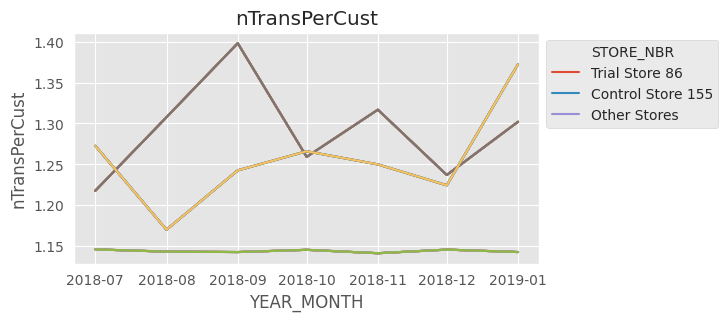

In [52]:
trial_store = 86
control_store = 155
plot_compare(trial_store, control_store, df_before_feb2019)

Choose store 155

### Store 88

In [20]:
## Choose the store with the highest score as the control store
trial_store = 88
control_store_88 = compare_store(trial_store, all_stores, df_before_feb2019)

control_store_88.head()

,trial_store,control_store,PearsonCorr,magnitude,avg_score
125,88.0,133.0,0.823860,0.510348,0.667104
170,88.0,178.0,0.668217,0.560405,0.614311
218,88.0,230.0,0.603833,0.557193,0.580513
192,88.0,201.0,0.570582,0.577846,0.574214
207,88.0,219.0,0.483145,0.653136,0.568141


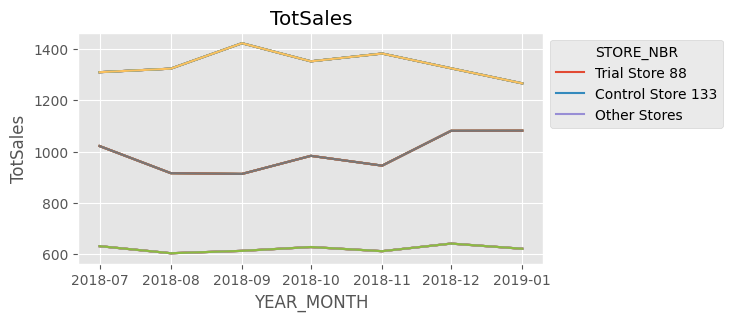

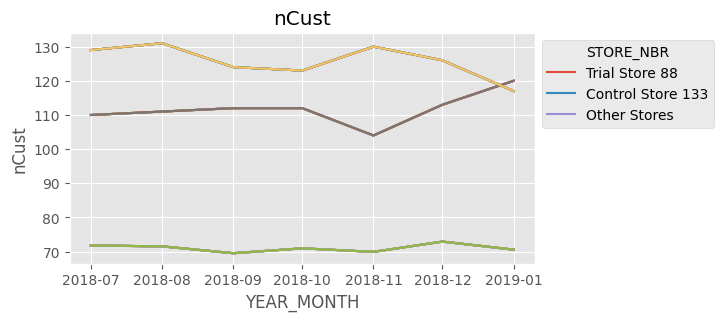

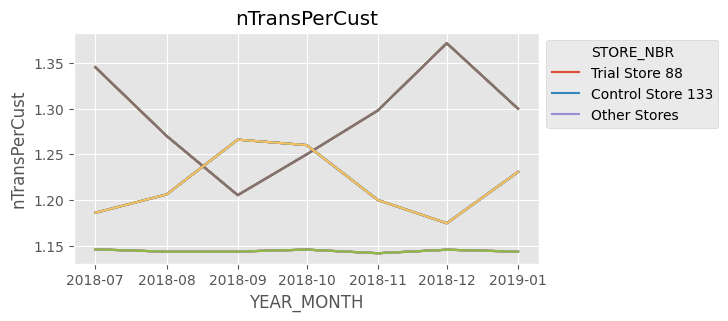

In [21]:
trial_store = 88
control_store = 133
plot_compare(trial_store, control_store, df_before_feb2019)

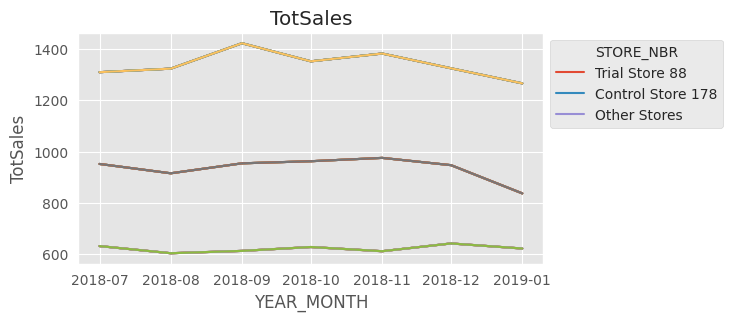

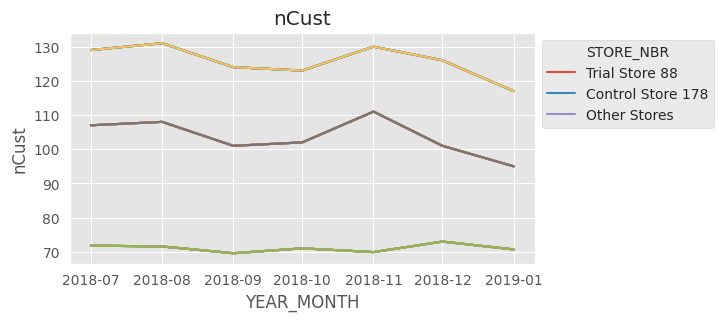

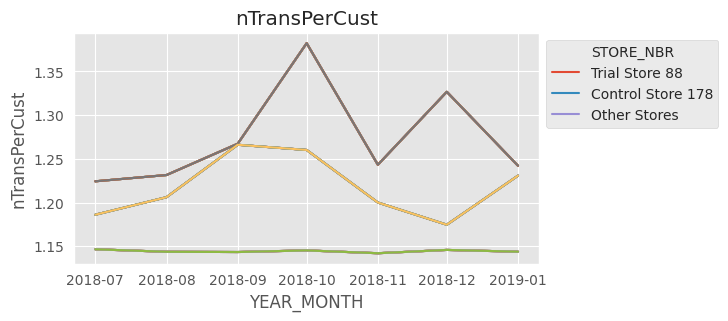

In [55]:
trial_store = 88
control_store = 178
plot_compare(trial_store, control_store, df_before_feb2019)

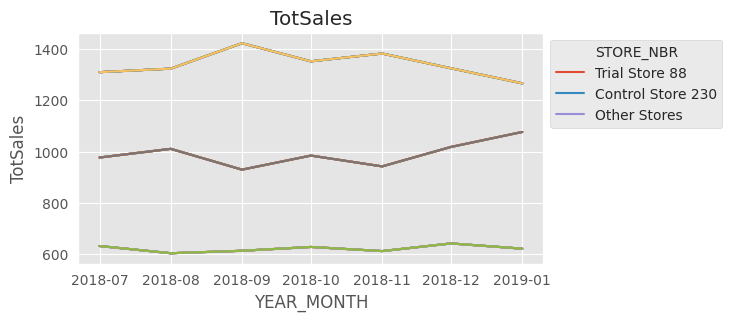

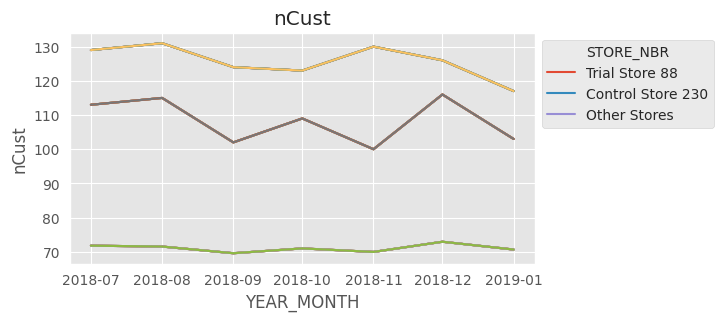

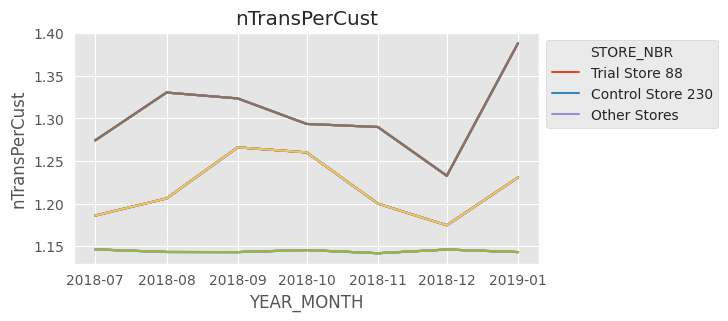

In [56]:
trial_store = 88
control_store = 230
plot_compare(trial_store, control_store, df_before_feb2019)

## 2.2. Assessment of trial

The trial period goes from the start of February 2019 to April 2019. We now want to
see if there has been an uplift in overall chip sales.

### Store 77

In [39]:
# Scale pre-trial control sales to match pre-trial trial store sales
trial_store = 77
control_store = 233
df_pre_trail = df_before_feb2019[df_before_feb2019['STORE_NBR'] == trial_store]
df_pre_control = df_before_feb2019[df_before_feb2019['STORE_NBR'] == control_store]
scale = (df_pre_trail['TotSales'].sum()) / (df_pre_control['TotSales'].sum())
print(f"Pre-trial scale: {scale}")

Pre-trial scale: 1.023617303289553


In [40]:
# get the scaled value for control store
control_store = 233
df_control_scaled = df_month[df_month['STORE_NBR'] == control_store].copy()
df_control_scaled['control_sales'] = df_control_scaled['TotSales']*scale
df_control_scaled

,STORE_NBR,YEAR_MONTH,TotSales,nCust,nTransPerCust,nChipsPerCust,avgPricePerUnit,control_sales
2699,233,2018-07-01,290.7,51,1.058824,1.725490,3.303409,297.565550
2700,233,2018-08-01,285.9,48,1.041667,1.666667,3.573750,292.652187
2701,233,2018-09-01,228.6,42,1.071429,1.666667,3.265714,233.998916
2702,233,2018-10-01,185.7,35,1.028571,1.600000,3.316071,190.085733
2703,233,2018-11-01,211.6,40,1.025000,1.550000,3.412903,216.597421
2704,233,2018-12-01,279.8,47,1.063830,1.595745,3.730667,286.408121
2705,233,2019-01-01,177.5,35,1.000000,1.342857,3.776596,181.692071
2706,233,2019-02-01,244.0,45,1.044444,1.555556,3.485714,249.762622
2707,233,2019-03-01,199.1,40,1.025000,1.475000,3.374576,203.802205
2708,233,2019-04-01,158.6,30,1.066667,1.533333,3.447826,162.345704


In [41]:
# Calculate the percentage difference between scaled control sales and trial sales
df_diff = pd.merge(df_control_scaled[['YEAR_MONTH','control_sales']], df_month[df_month['STORE_NBR'] == trial_store][['YEAR_MONTH','TotSales']],
                   on='YEAR_MONTH', how='inner')
df_diff.rename(columns={'TotSales':'trial_sales'}, inplace=True)
df_diff['percent_diff'] = abs(df_diff['control_sales'] - df_diff['trial_sales'])/df_diff['control_sales']
df_diff

,YEAR_MONTH,control_sales,trial_sales,percent_diff
0,2018-07-01,297.565550,296.8,0.002573
1,2018-08-01,292.652187,255.5,0.126950
2,2018-09-01,233.998916,225.2,0.037602
3,2018-10-01,190.085733,204.5,0.075830
4,2018-11-01,216.597421,245.3,0.132516
5,2018-12-01,286.408121,267.3,0.066716
6,2019-01-01,181.692071,204.4,0.124980
7,2019-02-01,249.762622,235.0,0.059107
8,2019-03-01,203.802205,278.5,0.366521
9,2019-04-01,162.345704,263.5,0.623080


In [42]:
# test the hypothesis that the sales difference is significant: use t-test
# import tatistics Libraries
from statistics import stdev
from scipy.stats import t

# calculate the standard deviation of the percen_diff during trials
std_trails = stdev(df_diff[df_diff['YEAR_MONTH'] < '2019-02']['percent_diff'])
print(f"Standard deviation pre trials: {std_trails}")

# note that there are 8 months in the pre‐trial period hence 8 ‐ 1 = 7 degrees of freedom
degrees_of_freedom = 7

# We will test with a null hypothesis of there being 0 difference between  trial and control stores.
df_diff['tValue'] = (df_diff['percent_diff'] - 0) / std_trails
t_values = df_diff.loc[(df_diff['YEAR_MONTH'] < '2019-05') & (df_diff['YEAR_MONTH'] > '2019-01'), ['YEAR_MONTH', 'tValue']]
print(t_values)


# calculate 95th percentile of t-distribution with appropriate degrees of freedom
t_crit = t.ppf(0.95, df=degrees_of_freedom)
print(f'\nValue at 95th percentile: {t_crit}')

Standard deviation pre trials: 0.049940762641425364
  YEAR_MONTH     tValue
7 2019-02-01   1.183534
8 2019-03-01   7.339116
9 2019-04-01  12.476373

Value at 95th percentile: 1.894578605061305


Null hypothesis: The sales before and after trial is the same

Both Critical values for March and April are larger than which means those values we can reject the null hypothesis for those 2 months. The difference in sales of trial store in trail period of March and April is statistically significant

In [43]:
# Let's plot the sales of the control store, the sales of the trial stores
# and the 95th percentile value of sales of the control store
df_sales = df_diff.drop(columns=['percent_diff', 'tValue'], axis=1)
df_sales['5th percentile'] = df_sales['control_sales']*(1 - 2*std_trails)
df_sales['95th percentile'] = df_sales['control_sales']*(1 + 2*std_trails)
df_sales.set_index('YEAR_MONTH', inplace=True)
df_sales

,control_sales,trial_sales,5th percentile,95th percentile
YEAR_MONTH,,,,
2018-07-01,297.565550,296.8,267.844249,327.286851
2018-08-01,292.652187,255.5,263.421640,321.882734
2018-09-01,233.998916,225.2,210.626747,257.371084
2018-10-01,190.085733,204.5,171.099680,209.071786
2018-11-01,216.597421,245.3,194.963341,238.231502
2018-12-01,286.408121,267.3,257.801241,315.015001
2019-01-01,181.692071,204.4,163.544390,199.839753
2019-02-01,249.762622,235.0,224.815950,274.709294
2019-03-01,203.802205,278.5,183.446130,224.158280


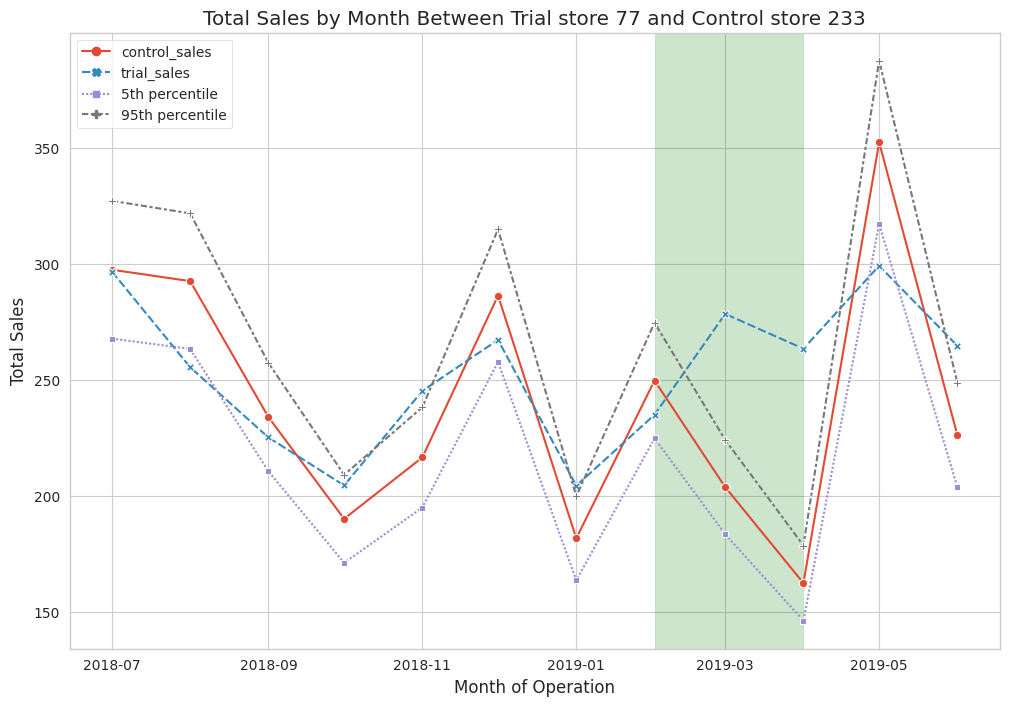

In [46]:
plt.figure(figsize = (12, 8))
sns.set_style("whitegrid")
ax = sns.lineplot(data=df_sales, markers=True)
ax.set_title('Total Sales by Month Between Trial store 77 and Control store 233')
ax.set_xlabel('Month of Operation')
ax.set_ylabel('Total Sales')
#ax.set_ylim((0, 400))
ax.axvspan('2019-02-01', '2019-04-01', color='green', alpha = 0.2)
plt.legend()
plt.show()

We can see the sales values of trail store in March and April are outside the [5th percentile, 95th percentile] confident interval which mean the sales are significantly different before the trial and in the trial for those 2 months.

Let's create a function to repeat the step for different columns and stores.

In [29]:
def assess_trial(trial_store, control_store, df_trial=df_before_feb2019, df_full=df_month, column='TotSales'):
  # Scale pre-trial control sales to match pre-trial trial store sales
  df_pre_trail = df_trial[df_trial['STORE_NBR'] == trial_store]
  df_pre_control = df_trial[df_trial['STORE_NBR'] == control_store]
  scale = (df_pre_trail[column].sum()) / (df_pre_control[column].sum())
  print(f"Pre-trial scale: {scale}")

  # get the scaled value for control store
  df_control_scaled = df_full[df_full['STORE_NBR'] == control_store].copy()
  df_control_scaled[f'control_{column}'] = df_control_scaled[column]*scale
  df_control_scaled

  # Calculate the percentage difference between scaled control sales and trial sales
  df_diff = pd.merge(df_control_scaled[['YEAR_MONTH',f'control_{column}']], df_full[df_full['STORE_NBR'] == trial_store][['YEAR_MONTH',column]],
                     on='YEAR_MONTH', how='inner')
  df_diff.rename(columns={column:f'trial_{column}'}, inplace=True)
  df_diff['percent_diff'] = abs(df_diff[f'control_{column}'] - df_diff[f'trial_{column}'])/df_diff[f'control_{column}']

  # calculate the standard deviation of the percen_diff during trials
  std_trails = stdev(df_diff[df_diff['YEAR_MONTH'] < '2019-02']['percent_diff'])
  print(f"Standard deviation pre trials: {std_trails}")

  # note that there are 8 months in the pre‐trial period hence 8 ‐ 1 = 7 degrees of freedom
  degrees_of_freedom = 7

  # We will test with a null hypothesis of there being 0 difference between  trial and control stores.
  df_diff['tValue'] = (df_diff['percent_diff'] - 0) / std_trails
  t_values = df_diff.loc[(df_diff['YEAR_MONTH'] < '2019-05') & (df_diff['YEAR_MONTH'] > '2019-01'), ['YEAR_MONTH', 'tValue']]
  print(t_values)


  # calculate 95th percentile of t-distribution with appropriate degrees of freedom
  t_crit = t.ppf(0.95, df=degrees_of_freedom)
  print(f'\nValue at 95th percentile: {t_crit}')

  # Let's plot the sales of the control store, the sales of the trial stores
  df_plot = df_diff.drop(columns=['percent_diff', 'tValue'], axis=1)
  df_plot['5th percentile'] = df_plot[f'control_{column}']*(1 - 2*std_trails)
  df_plot['95th percentile'] = df_plot[f'control_{column}']*(1 + 2*std_trails)
  df_plot.set_index('YEAR_MONTH', inplace=True)

  plt.figure(figsize = (12, 8))
  sns.set_style("whitegrid")
  ax = sns.lineplot(df_plot, markers=True)
  ax.set_title(f'{column} by Month Between Trial store {trial_store} and Control store {control_store}')
  ax.set_xlabel('Month of Operation')
  ax.set_ylabel(column)
  #ax.set_ylim((0, 400))
  ax.axvspan('2019-02-01', '2019-04-01', color='green', alpha = 0.2)
  plt.legend()
  plt.show()

Pre-trial scale: 1.0033557046979866
Standard deviation pre trials: 0.018240748558243945
  YEAR_MONTH     tValue
7 2019-02-01   0.183352
8 2019-03-01  13.476388
9 2019-04-01  30.778725

Value at 95th percentile: 1.894578605061305


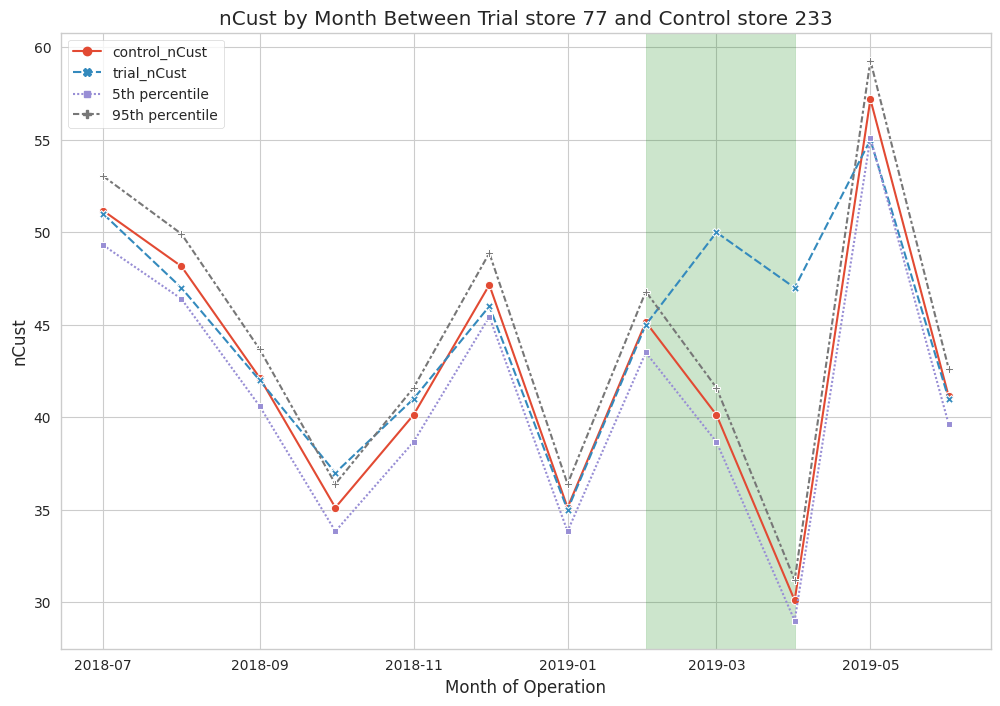

In [30]:
# repeat for all other stores
trial = 77
control = 233
column = 'nCust'
assess_trial(trial_store=trial, control_store=control, column=column)

### Store 86

Pre-trial scale: 0.9700651481287743
Standard deviation pre trials: 0.02583395285477237
  YEAR_MONTH     tValue
7 2019-02-01   2.179542
8 2019-03-01  12.226922
9 2019-04-01   1.364580

Value at 95th percentile: 1.894578605061305


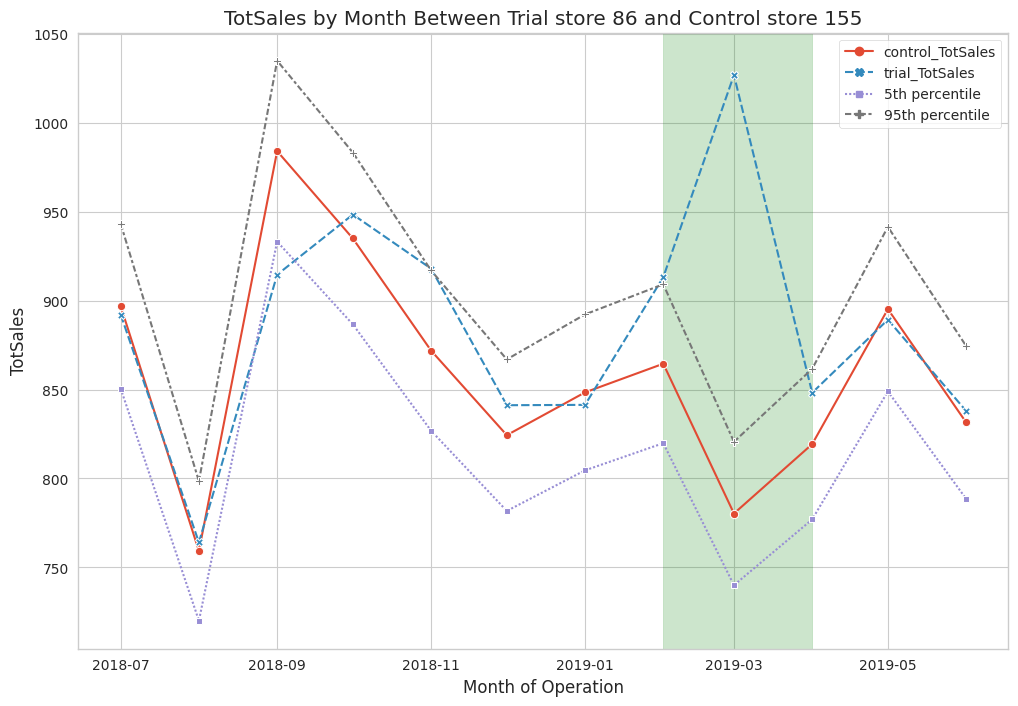

In [53]:
# repeat for all other stores
trial = 86
control = 155
column = 'TotSales'
assess_trial(trial_store=trial, control_store=control, column=column)

Pre-trial scale: 1.0
Standard deviation pre trials: 0.010687444701395238
  YEAR_MONTH     tValue
7 2019-02-01  11.819082
8 2019-03-01  20.903430
9 2019-04-01   5.670772

Value at 95th percentile: 1.894578605061305


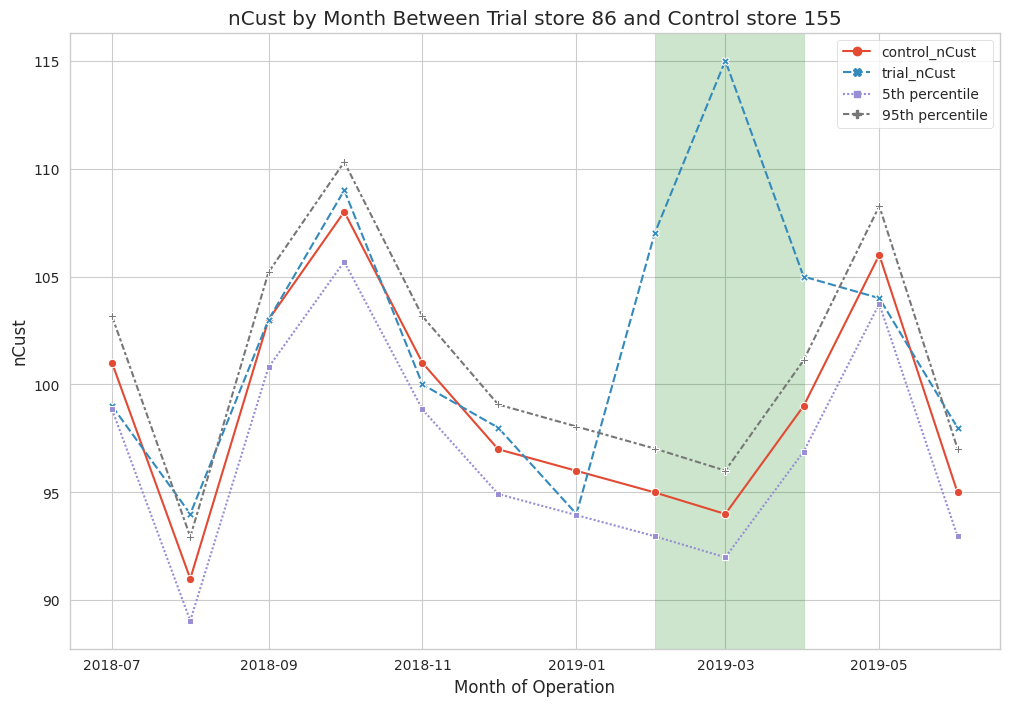

In [54]:
# repeat for all other stores
trail_store = 86
control_store = 155
column = 'nCust'
assess_trial(trail_store, control_store, column=column)

### Store 88

Pre-trial scale: 1.4338146535258616
Standard deviation pre trials: 0.01707405192279757
  YEAR_MONTH    tValue
7 2019-02-01  7.163302
8 2019-03-01  1.844699
9 2019-04-01  3.089489

Value at 95th percentile: 1.894578605061305


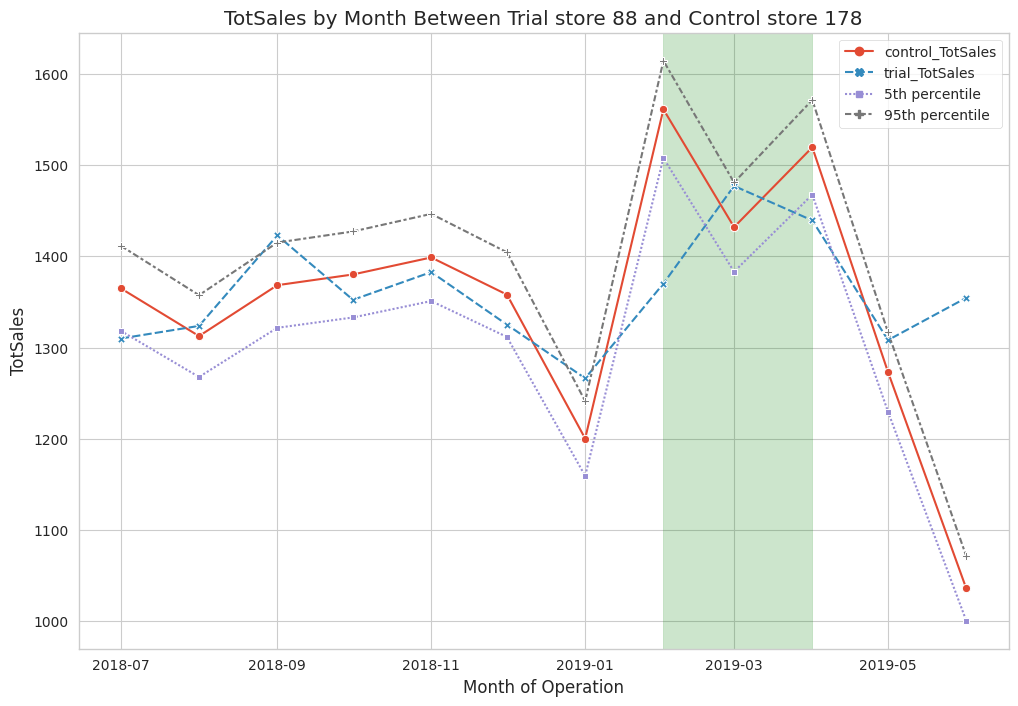

In [58]:
# repeat for all other stores
trial = 88
control = 178
column = 'TotSales'
assess_trial(trial_store=trial, control_store=control, column=column)

Pre-trial scale: 1.2137931034482758
Standard deviation pre trials: 0.012417826272588403
  YEAR_MONTH    tValue
7 2019-02-01  3.643322
8 2019-03-01  2.544639
9 2019-04-01  7.946568

Value at 95th percentile: 1.894578605061305


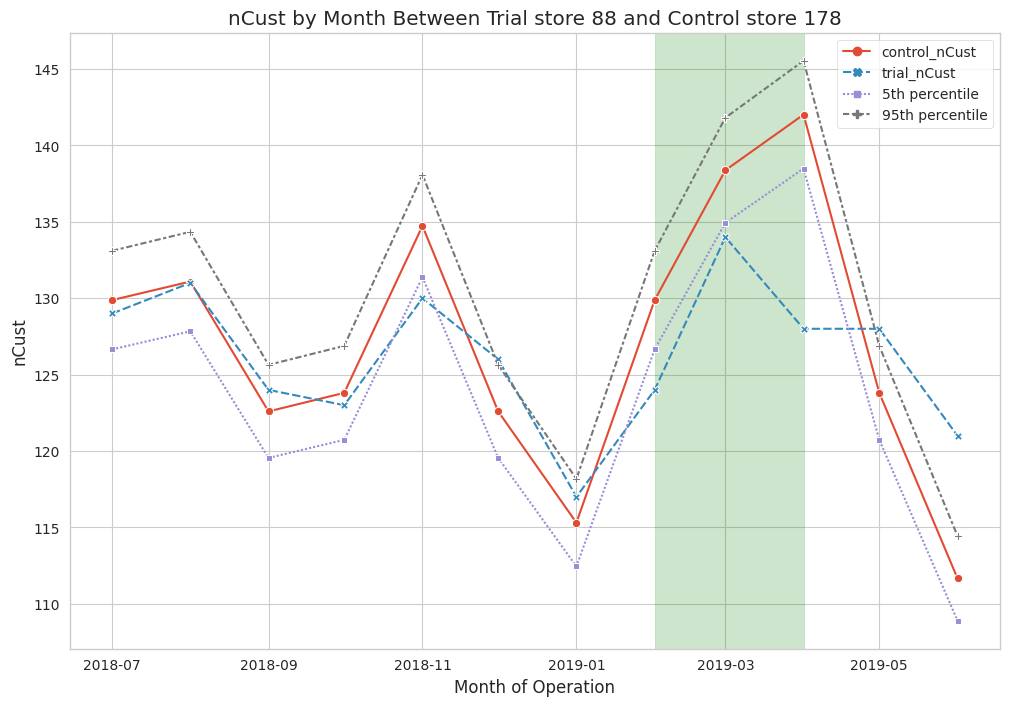

In [59]:
# repeat for all other stores
trial = 88
control = 178
column = 'nCust'
assess_trial(trial_store=trial, control_store=control, column=column)

## 2.3. Collate findings

Control stores for trial stores 77, 86 and 88 are 233, 155, 178 respectively.

I found that with store 77 and 86, there're 2 month March and April experienced a statistically significant increase in sales and customers while there's none for store 88.

We'll might need to ask further if any special promotion or events are running at those stores.